In [1]:
import kaleido
import pandas as pd
import numpy as np
import plotly.graph_objects as go
######## Search space #########
import sys
sys.path.append("../")
from search_space.RegNet import RegNet
from search_space.utils import create_widths_plot, scatter_results
# Initialize an empty list to store dictionaries
def results_to_df(path, name):
    data = []
    # Open the text file
    with open(path, 'r') as file:
        lines = file.readlines()
        # Initialize an empty dictionary to store data for each block
        block_data = {}
        for line in lines:
            # If the line contains dashes, it indicates the end of a block
            if '-------------------------' in line:
                # If block_data is not empty, add it to the list of data dictionaries
                if block_data:
                    data.append(block_data)
                    # Reset block_data for the next block
                    block_data = {}
            elif 'best_acc' in line:
                continue
            else:
                # Split the line by ':'
                #print(line)
                key, value = line.strip().split(': ')
                # Store the key-value pair in the block_data dictionary
                block_data[key] = value

    # Create a DataFrame from the list of dictionaries
    df = pd.DataFrame(data)

    # Convert columns to appropriate data types if needed
    df['epoch'] = df['epoch'].astype(int)
    df['lr'] = df['lr'].astype(float)
    df['train_acc'] = df['train_acc'].astype(float)
    df['train_loss'] = df['train_loss'].astype(float)
    df['test_acc'] = df['test_acc'].astype(float)
    df['test_acc_top5'] = df['test_acc_top5'].astype(float)
    df['test_loss'] = df['test_loss'].astype(float)
    df['epoch_time'] = df['epoch_time'].astype(float)
    df=df.assign(name=name)
    
    return df

/home/hpc/iwb3/iwb3021h/.local/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import json
import os

def get_predictor_data(studies):
    train_data=[]
    for study_folder in studies: 
        data=[]
        #study_folder=f"/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/classifier_train/{study_name}"
        subjects= os.listdir(study_folder)

        subjects=[subject for subject in subjects if os.path.isdir(f"{study_folder}/{subject}")]
        print(subjects)
        for name in subjects:
            try:
                test_acc=results_to_df(f"{study_folder}/{name}/worklog.txt", f"{name}")[["epoch","test_acc","name"]]
                #test_acc=test_acc.rename(columns={"test_acc":"acc","test_loss":"test_acc"})
                #test_acc=test_acc.rename(columns={"test_loss":"test_acc"})
                #print(test_acc.columns)
                #if len(test_acc)>49:
                test_acc_piv = test_acc[["epoch","test_acc","name"]].pivot(index='name', columns='epoch', values='test_acc').add_prefix("epoch_").reset_index()
                #test_acc_piv["best_acc"]=test_acc["acc"].max()
                data.append(test_acc_piv)
            except:
                pass
        data=pd.concat(data)
        train_data.append(data)
    train_data=pd.concat(train_data)
    return train_data

In [3]:
corr_scores={}
accuracies={}
test_accuracies={}
epochs_results={}

In [78]:
import pandas as pd
from itertools import combinations

#train_data=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/vanilla/16_08_2024_00_41/Gutenberg"]).sort_values("name").set_index("name")
#train_data=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/vanilla/16_08_2024_11_44/Mateo"]).sort_values("name").set_index("name")
#train_data=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/vanilla/16_08_2024_13_43/Chester"]).sort_values("name").set_index("name")
#train_data=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/vanilla/17_08_2024_16_47/Adaline"]).sort_values("name").set_index("name")
#train_data=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/vanilla/17_08_2024_16_21/LaMelo"]).sort_values("name").set_index("name")
train_data=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/vanilla/18_08_2024_10_32/Caitie"]).sort_values("name").set_index("name")
#train_data=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/vanilla/18_08_2024_17_04/Sadie"]).sort_values("name").set_index("name")



['abiding_turaco', 'able_fennec', 'able_griffin', 'aboriginal_okapi', 'abstract_spoonbill', 'acrid_echidna', 'adaptable_weasel', 'adept_orangutan', 'adept_sponge', 'adept_weasel', 'amber_jackdaw', 'antique_taipan', 'apricot_jerboa', 'asparagus_mammoth', 'astute_ape', 'axiomatic_vole', 'axiomatic_wallaby', 'azure_asp', 'beige_panther', 'benign_jackrabbit', 'bizarre_grouse', 'bold_mouse', 'busy_lemur', 'calculating_coyote', 'capable_carp', 'capable_mussel', 'carrot_chameleon', 'certain_mastodon', 'certain_porpoise', 'cerulean_galago', 'charming_dachshund', 'cherry_mastiff', 'cherry_rook', 'cocky_gerbil', 'competent_bee', 'cooperative_tench', 'daffodil_mackerel', 'daffy_mongrel', 'dancing_angelfish', 'dashing_sidewinder', 'dazzling_polecat', 'deft_alpaca', 'delicate_lemur', 'delicate_swift', 'devious_cicada', 'diamond_tench', 'didactic_turkey', 'divergent_mole', 'dramatic_impala']


In [79]:
#train_data=train_data.head(len(train_data_dist))

In [80]:
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/kd/16_08_2024_00_44/Gutenberg"]).sort_values("name").set_index("name")
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/kd/16_08_2024_20_27/Mateo"]).sort_values("name").set_index("name")
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/kd/17_08_2024_14_47/Chester"]).sort_values("name").set_index("name")
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/kd/18_08_2024_01_01/Adaline"]).sort_values("name").set_index("name")
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/kd/18_08_2024_19_07/LaMelo"]).sort_values("name").set_index("name")
train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/kd/18_08_2024_19_21/Caitie"]).sort_values("name").set_index("name")
#train_data_dist=get_predictor_data(studies=["/home/woody/iwb3/iwb3021h/NAS_COMPETITION_RESULTS/kwnowledge_distillation/kd/19_08_2024_07_46/Sadie"]).sort_values("name").set_index("name")
train_data_dist=train_data_dist.head(len(train_data))

['abiding_turaco', 'able_fennec', 'able_griffin', 'aboriginal_okapi', 'abstract_spoonbill', 'acrid_echidna', 'adaptable_weasel', 'adept_orangutan', 'adept_sponge', 'adept_weasel', 'amber_jackdaw', 'antique_taipan', 'apricot_jerboa', 'asparagus_mammoth', 'astute_ape', 'axiomatic_vole', 'axiomatic_wallaby', 'azure_asp', 'beige_panther', 'benign_jackrabbit', 'bizarre_grouse', 'bold_mouse', 'busy_lemur', 'calculating_coyote', 'capable_carp', 'capable_mussel', 'carrot_chameleon', 'certain_mastodon', 'certain_porpoise', 'cerulean_galago', 'charming_dachshund', 'cherry_mastiff', 'cherry_rook', 'cocky_gerbil', 'competent_bee', 'cooperative_tench', 'daffodil_mackerel', 'daffy_mongrel', 'dancing_angelfish', 'dashing_sidewinder', 'dazzling_polecat', 'deft_alpaca', 'delicate_lemur', 'delicate_swift', 'devious_cicada', 'diamond_tench', 'didactic_turkey', 'divergent_mole', 'dramatic_impala', 'elegant_aardwark', 'emerald_earthworm', 'esoteric_husky', 'expert_tody', 'fanatic_chicken', 'fancy_kestrel',

In [81]:
train_data

epoch,epoch_0,epoch_1,epoch_2,epoch_3,epoch_4,epoch_5,epoch_6,epoch_7,epoch_8,epoch_9,...,epoch_41,epoch_42,epoch_43,epoch_44,epoch_45,epoch_46,epoch_47,epoch_48,epoch_49,epoch_50
name,,,,,,,,,,,,,,,,,,,,,
abiding_turaco,25.65,38.59,41.29,43.52,43.26,47.83,49.60,47.65,53.60,55.89,...,85.46,85.29,85.67,85.36,85.77,86.02,85.96,86.13,85.78,86.01
able_fennec,24.76,39.20,40.58,43.05,48.85,49.69,51.64,53.68,51.05,55.25,...,80.87,81.06,81.22,81.27,81.24,81.29,81.27,81.42,81.41,81.51
able_griffin,24.76,35.77,39.63,34.53,38.01,43.31,44.77,46.29,48.11,46.49,...,82.99,83.21,83.15,83.49,83.65,83.61,83.75,83.80,83.86,83.81
aboriginal_okapi,24.96,34.60,43.81,43.79,45.21,48.97,51.87,52.53,56.39,56.77,...,83.34,83.25,83.23,83.47,83.64,83.67,83.50,83.53,83.59,83.50
abstract_spoonbill,25.09,33.59,39.20,41.17,41.91,42.81,44.19,46.83,48.65,48.27,...,77.69,77.87,77.57,77.91,78.14,78.20,78.15,78.35,78.24,78.42
acrid_echidna,24.76,38.91,37.05,41.21,38.99,49.83,47.91,52.15,51.81,52.49,...,85.18,85.15,85.27,85.14,85.42,85.41,85.56,85.49,85.47,85.54
adaptable_weasel,24.76,40.39,41.26,45.83,43.09,48.85,48.84,53.18,56.82,55.84,...,86.11,86.15,85.89,86.17,86.33,86.49,86.49,86.53,86.50,86.59
adept_orangutan,25.09,39.09,41.43,43.55,42.85,49.25,46.10,52.03,52.49,52.99,...,81.77,81.59,81.54,81.73,81.80,81.67,81.75,81.84,81.83,81.71
adept_sponge,24.76,40.79,41.71,40.10,46.22,47.57,49.36,49.58,53.53,54.44,...,80.68,80.77,80.55,80.63,80.67,80.76,80.70,80.72,80.85,80.76


In [82]:
train_data
#train_data_cum= train_data.iloc[:,:-1].cummin(axis=1)
#train_data_cum["best_acc"]=train_data["best_acc"]

epoch,epoch_0,epoch_1,epoch_2,epoch_3,epoch_4,epoch_5,epoch_6,epoch_7,epoch_8,epoch_9,...,epoch_41,epoch_42,epoch_43,epoch_44,epoch_45,epoch_46,epoch_47,epoch_48,epoch_49,epoch_50
name,,,,,,,,,,,,,,,,,,,,,
abiding_turaco,25.65,38.59,41.29,43.52,43.26,47.83,49.60,47.65,53.60,55.89,...,85.46,85.29,85.67,85.36,85.77,86.02,85.96,86.13,85.78,86.01
able_fennec,24.76,39.20,40.58,43.05,48.85,49.69,51.64,53.68,51.05,55.25,...,80.87,81.06,81.22,81.27,81.24,81.29,81.27,81.42,81.41,81.51
able_griffin,24.76,35.77,39.63,34.53,38.01,43.31,44.77,46.29,48.11,46.49,...,82.99,83.21,83.15,83.49,83.65,83.61,83.75,83.80,83.86,83.81
aboriginal_okapi,24.96,34.60,43.81,43.79,45.21,48.97,51.87,52.53,56.39,56.77,...,83.34,83.25,83.23,83.47,83.64,83.67,83.50,83.53,83.59,83.50
abstract_spoonbill,25.09,33.59,39.20,41.17,41.91,42.81,44.19,46.83,48.65,48.27,...,77.69,77.87,77.57,77.91,78.14,78.20,78.15,78.35,78.24,78.42
acrid_echidna,24.76,38.91,37.05,41.21,38.99,49.83,47.91,52.15,51.81,52.49,...,85.18,85.15,85.27,85.14,85.42,85.41,85.56,85.49,85.47,85.54
adaptable_weasel,24.76,40.39,41.26,45.83,43.09,48.85,48.84,53.18,56.82,55.84,...,86.11,86.15,85.89,86.17,86.33,86.49,86.49,86.53,86.50,86.59
adept_orangutan,25.09,39.09,41.43,43.55,42.85,49.25,46.10,52.03,52.49,52.99,...,81.77,81.59,81.54,81.73,81.80,81.67,81.75,81.84,81.83,81.71
adept_sponge,24.76,40.79,41.71,40.10,46.22,47.57,49.36,49.58,53.53,54.44,...,80.68,80.77,80.55,80.63,80.67,80.76,80.70,80.72,80.85,80.76


In [83]:
train_data_cum= train_data.cummax(axis=1)
train_data_cum["best_acc"]=train_data_cum.max(axis=1)
train_data["best_acc"]=train_data.max(axis=1)

train_data_dist_cum= train_data_dist.cummax(axis=1)
train_data_dist_cum["best_acc"]=train_data_dist_cum.max(axis=1)
train_data_dist["best_acc"]=train_data_dist.max(axis=1)

In [84]:
#train_data_cum= train_data.cummin(axis=1)
#train_data_cum["best_acc"]=train_data_cum.min(axis=1)
#train_data["best_acc"]=train_data.min(axis=1)

#train_data_dist_cum= train_data_dist.cummin(axis=1)
#train_data_dist_cum["best_acc"]=train_data_dist_cum.min(axis=1)
#train_data_dist["best_acc"]=train_data_dist.min(axis=1)

In [85]:
train_data.sort_values("best_acc",ascending=False)

epoch,epoch_0,epoch_1,epoch_2,epoch_3,epoch_4,epoch_5,epoch_6,epoch_7,epoch_8,epoch_9,...,epoch_42,epoch_43,epoch_44,epoch_45,epoch_46,epoch_47,epoch_48,epoch_49,epoch_50,best_acc
name,,,,,,,,,,,,,,,,,,,,,
cherry_mastiff,25.32,34.78,38.40,44.87,49.89,49.97,50.72,50.34,56.18,58.53,...,86.59,86.57,86.63,86.75,86.71,86.77,86.85,86.75,86.79,86.85
adaptable_weasel,24.76,40.39,41.26,45.83,43.09,48.85,48.84,53.18,56.82,55.84,...,86.15,85.89,86.17,86.33,86.49,86.49,86.53,86.50,86.59,86.59
abiding_turaco,25.65,38.59,41.29,43.52,43.26,47.83,49.60,47.65,53.60,55.89,...,85.29,85.67,85.36,85.77,86.02,85.96,86.13,85.78,86.01,86.13
asparagus_mammoth,24.88,33.47,39.63,41.93,41.63,43.43,44.97,45.21,45.98,45.61,...,85.19,85.34,85.51,85.61,85.45,85.65,85.59,85.57,85.51,85.65
certain_porpoise,25.21,35.38,40.84,40.71,46.39,48.52,50.06,52.09,54.93,56.26,...,85.12,85.32,85.31,85.38,85.35,85.50,85.60,85.49,85.43,85.60
acrid_echidna,24.76,38.91,37.05,41.21,38.99,49.83,47.91,52.15,51.81,52.49,...,85.15,85.27,85.14,85.42,85.41,85.56,85.49,85.47,85.54,85.56
charming_dachshund,26.81,41.21,40.02,46.53,46.84,48.14,52.13,44.71,56.04,57.49,...,84.97,85.40,85.32,85.27,85.48,85.55,85.31,85.47,85.39,85.55
dashing_sidewinder,24.76,38.23,40.43,41.15,45.93,47.67,50.13,49.03,52.17,54.75,...,85.37,85.03,85.30,85.43,85.23,85.43,85.23,85.19,85.13,85.43
cherry_rook,24.94,40.52,42.85,41.59,46.59,47.67,52.05,52.40,55.53,56.38,...,84.85,84.65,84.89,84.94,84.95,84.99,85.01,84.99,85.03,85.03


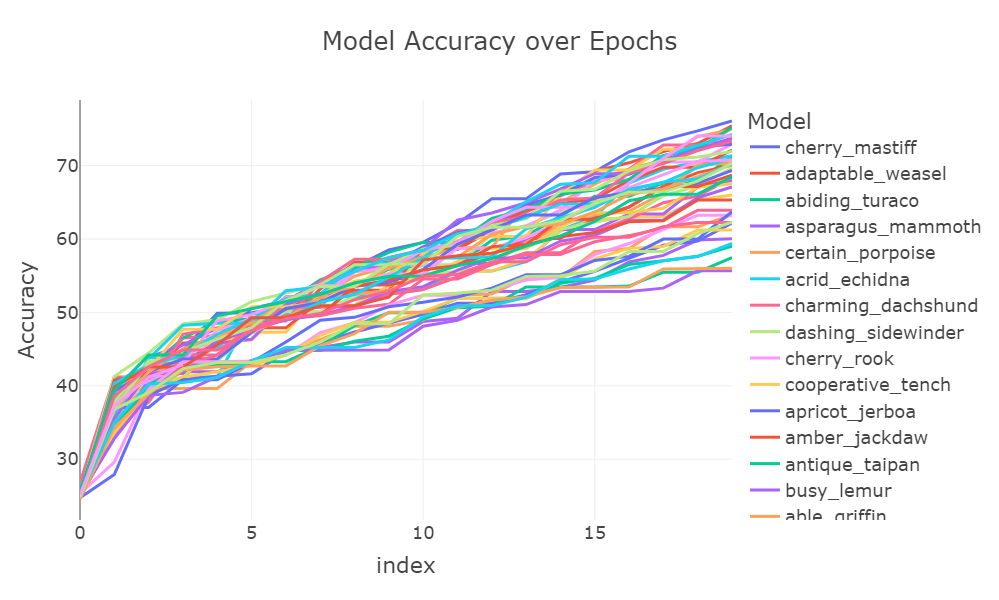

In [86]:
epochs_data=train_data_cum.sort_values("best_acc",ascending= False).iloc[:,:20].T.reset_index(drop=True).reset_index().melt(id_vars='index', var_name='Model', value_name='Accuracy')

import plotly.express as px
fig = px.line(epochs_data, x='index', y='Accuracy', color='Model', title='Model Accuracy over Epochs')
fig.update_layout(height=600, width=800, template="presentation")
fig

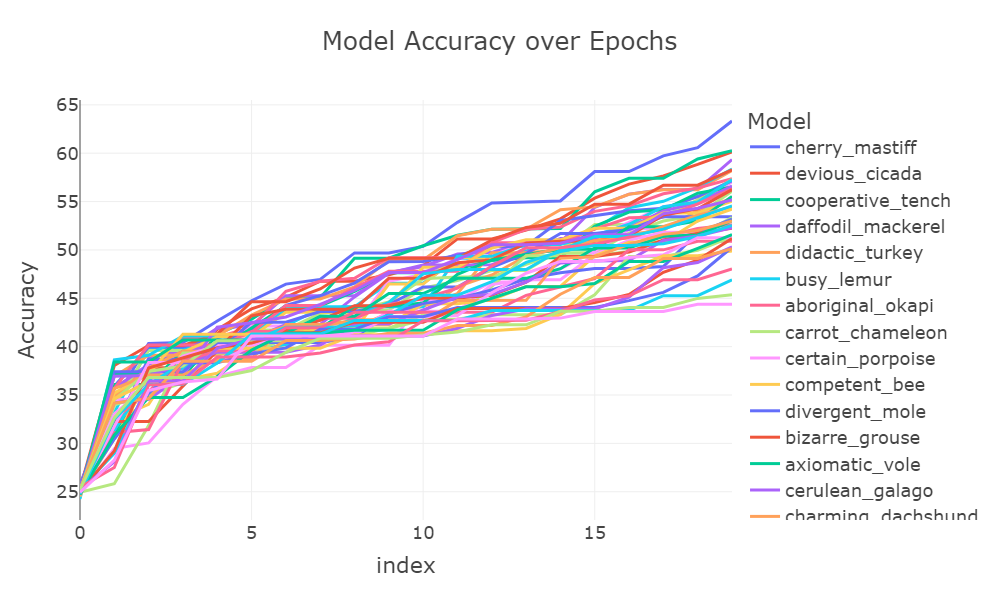

In [87]:
epochs_data=train_data_dist_cum.sort_values("best_acc",ascending= False).iloc[:,:20].T.reset_index(drop=True).reset_index().melt(id_vars='index', var_name='Model', value_name='Accuracy')

import plotly.express as px
fig = px.line(epochs_data, x='index', y='Accuracy', color='Model', title='Model Accuracy over Epochs')
fig.update_layout(height=600, width=800, template="presentation")
fig

In [88]:
train_data_cum=train_data_cum.reset_index()
train_data=train_data.reset_index()

train_data_dist_cum=train_data_dist_cum.reset_index()
train_data_dist=train_data_dist.reset_index()


In [89]:
correlation_matrix_base = train_data_cum.set_index("name").corr()
# Select the correlations with the last column
correlation_with_last_base = correlation_matrix_base.iloc[:-1, -1]

df_comp=pd.merge(train_data_dist_cum.iloc[:,:-1], train_data_cum[["name","best_acc"]], on="name")
correlation_matrix = df_comp.set_index("name").corr()
# Select the correlations with the last column
correlation_with_last = correlation_matrix.iloc[:-1, -1]

corr_df=pd.concat([pd.DataFrame(correlation_with_last_base).rename(columns={"best_acc":"base"}), pd.DataFrame(correlation_with_last).rename(columns={"best_acc":"dist"})], axis=1)


In [90]:
train_data_dist_cum

epoch,name,epoch_0,epoch_1,epoch_2,epoch_3,epoch_4,epoch_5,epoch_6,epoch_7,epoch_8,...,epoch_12,epoch_13,epoch_14,epoch_15,epoch_16,epoch_17,epoch_18,epoch_19,epoch_20,best_acc
0,abiding_turaco,24.76,37.16,37.16,37.16,40.39,40.53,41.10,41.89,44.19,...,48.97,49.51,50.07,50.07,52.39,52.39,53.00,55.54,56.58,56.58
1,able_fennec,24.96,35.20,37.21,41.27,41.27,41.27,41.27,41.83,42.25,...,44.85,46.23,46.23,49.39,50.80,50.80,52.99,54.21,54.65,54.65
2,able_griffin,25.01,29.21,37.79,38.84,39.88,40.37,41.43,41.43,42.53,...,43.95,43.95,43.95,44.55,45.40,47.69,48.95,51.19,51.74,51.74
3,aboriginal_okapi,25.21,34.73,38.19,40.95,40.95,42.03,45.73,46.76,47.07,...,50.75,52.13,52.36,53.99,54.56,55.81,56.41,57.37,59.11,59.11
4,abstract_spoonbill,24.77,32.51,36.07,36.12,38.30,41.30,41.30,41.30,42.71,...,43.73,43.73,43.73,43.73,43.73,45.27,45.27,46.91,49.57,49.57
5,acrid_echidna,24.73,29.47,30.05,34.04,36.94,37.84,37.84,40.15,40.15,...,46.69,46.69,48.05,49.86,52.11,52.31,53.37,55.44,57.07,57.07
6,adaptable_weasel,24.53,32.51,34.04,39.43,41.03,41.03,43.55,43.55,43.55,...,50.19,51.04,51.04,52.23,52.23,53.81,53.81,55.04,56.71,56.71
7,adept_orangutan,24.94,31.63,38.70,38.70,39.45,42.53,42.53,43.64,43.64,...,48.19,49.62,51.70,51.70,52.11,53.44,53.44,53.44,56.63,56.63
8,adept_sponge,25.09,33.04,36.11,39.03,40.09,41.03,41.10,41.10,41.47,...,46.42,46.93,46.93,49.55,50.99,51.83,51.83,53.08,54.86,54.86
9,adept_weasel,25.00,34.63,36.36,36.36,39.83,39.83,39.83,39.83,41.22,...,41.64,41.88,43.33,46.53,47.93,49.40,49.40,49.88,52.14,52.14


In [91]:
total_data=[]


pairs = list(combinations(train_data_cum.index, 2))
combined_data = []

for idx1, idx2 in pairs:
    row1 = train_data_cum.loc[idx1]
    row2 = train_data_cum.loc[idx2]
    

    combined_row = {
        'name_A': row1['name'],
        'name_B': row2['name'],
        'best_acc_A': row1['best_acc'],
        'best_acc_B': row2['best_acc'],
        'label': 1 if row1['best_acc'] > row2['best_acc'] else 0
        
    }
    # Create the epochs_row dictionary
    epochs_rows = {
        f'epoch_{epoch}_A': row1[f'epoch_{epoch}'] for epoch in range(0, 51)
    }
    epochs_rows.update({
        f'epoch_{epoch}_B': row2[f'epoch_{epoch}'] for epoch in range(0, 51)
    })
    ##############################################################
    row1_dist=train_data_dist_cum.loc[idx1]
    row2_dist=train_data_dist_cum.loc[idx2]
    dist_rows= {
        f'dist_{epoch}_A': row1_dist[f'epoch_{epoch}'] for epoch in range(0, 21)
    }
    dist_rows.update({
        f'dist_{epoch}_B': row2_dist[f'epoch_{epoch}'] for epoch in range(0, 21)
    })
    combined_row.update(dist_rows)
    #######################
    
    # Update combined_row with epochs_rows
    combined_row.update(epochs_rows)

    combined_data.append(combined_row)

combined_df = pd.DataFrame(combined_data)



In [92]:
X_test_new=combined_df.drop(columns=['label'])
y_test_new=combined_df["label"]

In [93]:
epoch=5
X_test_new[["name_A","name_B","best_acc_A","best_acc_B",f"dist_{epoch}_A",f"dist_{epoch}_B",f"epoch_{epoch}_A",f"epoch_{epoch}_B"]]

,name_A,name_B,best_acc_A,best_acc_B,dist_5_A,dist_5_B,epoch_5_A,epoch_5_B
0,abiding_turaco,able_fennec,86.13,81.51,40.53,41.27,47.83,49.69
1,abiding_turaco,able_griffin,86.13,83.86,40.53,40.37,47.83,43.31
2,abiding_turaco,aboriginal_okapi,86.13,83.67,40.53,42.03,47.83,48.97
3,abiding_turaco,abstract_spoonbill,86.13,78.42,40.53,41.30,47.83,42.81
4,abiding_turaco,acrid_echidna,86.13,85.56,40.53,37.84,47.83,49.83
...,...,...,...,...,...,...,...,...
1171,diamond_tench,divergent_mole,72.18,81.00,39.57,41.61,43.17,47.25
1172,diamond_tench,dramatic_impala,72.18,42.89,39.57,41.10,43.17,NaN
1173,didactic_turkey,divergent_mole,77.63,81.00,43.26,41.61,49.29,47.25
1174,didactic_turkey,dramatic_impala,77.63,42.89,43.26,41.10,49.29,NaN


In [94]:
epoch=2

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_0=np.repeat(0,len(y_test_new))
y_0= (X_test_new[f'epoch_{epoch}_A'] > X_test_new[f'epoch_{epoch}_B']).astype(int).values
# Calculate accuracy
y_0_accuracy = accuracy_score(y_test_new, y_0)
print(f"Accuracy: {y_0_accuracy}")

Accuracy: 0.4957482993197279


In [95]:
y_0=np.repeat(0,len(y_test_new))
y_0= (X_test_new[f'dist_{epoch}_A'] > X_test_new[f'dist_{epoch}_B']).astype(int).values
# Calculate accuracy
y_0_accuracy = accuracy_score(y_test_new, y_0)
print(f"Accuracy: {y_0_accuracy}")

Accuracy: 0.5068027210884354


In [96]:
from scipy.stats import spearmanr
from scipy.stats import kendalltau

def kendall_tau_distance(list1, list2):
    tau, _ = kendalltau(list1, list2)
    return tau
def spearman_rank_correlation(list1, list2):
    corr, _ = spearmanr(list1, list2)
    return corr
def get_correlations_epochs(combined_df):  
    accs={}
    accs_slope={}
    corrs={}
    corrs_slope={}
    results={}
    X_test_new=combined_df
    y_test_new=combined_df["label"]
    for epoch in range(0,51):
        #############################
        if epoch<=20:
            y_pred_slope= (X_test_new[f'dist_{epoch}_A'] > X_test_new[f'dist_{epoch}_B']).astype(int).values        
        else:
            y_pred_slope= (X_test_new[f'epoch_{epoch}_A'] >= X_test_new[f'epoch_{epoch}_B']).astype(int).values
        
        accuracy_slope = accuracy_score(y_test_new, y_pred_slope)
        accs_slope[epoch]=accuracy_slope
        ############################
        y_epoch_10_pred= (X_test_new[f'epoch_{epoch}_A'] >= X_test_new[f'epoch_{epoch}_B']).astype(int).values

        accuracy = accuracy_score(y_test_new, y_epoch_10_pred)
        accs[epoch]=accuracy
        
        ranking_test_df=X_test_new[["name_A","name_B", "label"]]
        ranking_test_df["pred_10_epochs"]=y_epoch_10_pred
        #####################
        ranking_test_df["pred_slope"]=y_pred_slope
        ################################
        # Create a new column by applying the function to each row
        ranking_target={}
        ranking_10={}
        ranking_slope={}
        
        for ind in list(ranking_test_df.name_A.unique())+list(ranking_test_df.name_B.unique()):
            ranking_target[ind]=0
            ranking_10[ind]=0
            ranking_slope[ind]=0
            
        for index, row in ranking_test_df.iterrows():
            if row["label"]==1:
                ranking_target[row["name_A"]]=ranking_target[row["name_A"]]+1
            else:
                ranking_target[row["name_B"]]=ranking_target[row["name_B"]]+1

            if row["pred_10_epochs"]==1:
                ranking_10[row["name_A"]]=ranking_10[row["name_A"]]+1
            else:
                ranking_10[row["name_B"]]=ranking_10[row["name_B"]]+1

            if row["pred_slope"]==1:
                ranking_slope[row["name_A"]]=ranking_slope[row["name_A"]]+1
            else:
                ranking_slope[row["name_B"]]=ranking_slope[row["name_B"]]+1

        ranking_target_df=pd.DataFrame([ranking_target]).T.rename(columns={0:"score"}).sort_values(by="score", ascending=False)
        ranking_10_df=pd.DataFrame([ranking_10]).T.rename(columns={0:"score"}).sort_values(by="score", ascending=False)

        ranking_slope_df=pd.DataFrame([ranking_slope]).T.rename(columns={0:"score"}).sort_values(by="score", ascending=False)

            
        ######## Correlation #########
        # Example usage
        target =ranking_target_df.index.tolist()
        list_to_compare_10 = ranking_10_df.index.tolist()
        # Convert the lists to ranks
        target_ranks = {k: i for i, k in enumerate(target)}
        list_to_compare_ranks_10 = [target_ranks[x] for x in list_to_compare_10]
        
        #####################################
        list_to_compare_slope = ranking_slope_df.index.tolist()
        list_to_compare_ranks_slope = [target_ranks[x] for x in list_to_compare_slope]
        spearman_corr_slope = spearman_rank_correlation(list_to_compare_ranks_slope, list(range(len(target))))
        corrs_slope[epoch]=spearman_corr_slope
        
        # Calculate Spearman rank correlation
        spearman_corr_10 = spearman_rank_correlation(list_to_compare_ranks_10, list(range(len(target))))
        print(f'Spearman rank correlation: {spearman_corr_10}')
        # Calculate Kendall Tau distance
        tau_distance_10 = kendall_tau_distance(list_to_compare_ranks_10, list(range(len(target))))
        print(f'Kendall Tau distance: {tau_distance_10}')
        corrs[epoch]=spearman_corr_10

    
    results["accuracy"]=accs
    results["correlation"]=corrs
    results["accuracy_slope"]=accs_slope
    results["correlation_slope"]=corrs_slope
    return results


In [97]:
corr_epochs=get_correlations_epochs(combined_df)

/tmp/ipykernel_387751/3614623924.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_387751/3614623924.py:36: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_387751/3614623924.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipyke

Spearman rank correlation: 0.20744897959183672
Kendall Tau distance: 0.14625850340136054
Spearman rank correlation: 0.2177551020408163
Kendall Tau distance: 0.13435374149659862
Spearman rank correlation: 0.007653061224489796
Kendall Tau distance: -0.008503401360544217


/tmp/ipykernel_387751/3614623924.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_387751/3614623924.py:36: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_387751/3614623924.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipyke

Spearman rank correlation: 0.2064285714285714
Kendall Tau distance: 0.13945578231292516
Spearman rank correlation: 0.1946938775510204
Kendall Tau distance: 0.13945578231292516
Spearman rank correlation: 0.2594897959183673
Kendall Tau distance: 0.17517006802721086


/tmp/ipykernel_387751/3614623924.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_387751/3614623924.py:36: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_387751/3614623924.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipyke

Spearman rank correlation: 0.23357142857142857
Kendall Tau distance: 0.1530612244897959
Spearman rank correlation: 0.3161224489795918
Kendall Tau distance: 0.22448979591836732
Spearman rank correlation: 0.44734693877551013
Kendall Tau distance: 0.3248299319727891


/tmp/ipykernel_387751/3614623924.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_387751/3614623924.py:36: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_387751/3614623924.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipyke

Spearman rank correlation: 0.4206122448979592
Kendall Tau distance: 0.30782312925170063
Spearman rank correlation: 0.40316326530612245
Kendall Tau distance: 0.28911564625850333
Spearman rank correlation: 0.40867346938775506
Kendall Tau distance: 0.2993197278911564


/tmp/ipykernel_387751/3614623924.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_387751/3614623924.py:36: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_387751/3614623924.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipyke

Spearman rank correlation: 0.4147959183673469
Kendall Tau distance: 0.2789115646258503
Spearman rank correlation: 0.48581632653061224
Kendall Tau distance: 0.3605442176870748
Spearman rank correlation: 0.5156122448979591
Kendall Tau distance: 0.3673469387755101


/tmp/ipykernel_387751/3614623924.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_387751/3614623924.py:36: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_387751/3614623924.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipyke

Spearman rank correlation: 0.5683673469387754
Kendall Tau distance: 0.4336734693877551
Spearman rank correlation: 0.5558163265306122
Kendall Tau distance: 0.423469387755102


/tmp/ipykernel_387751/3614623924.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_387751/3614623924.py:36: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_387751/3614623924.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipyke

Spearman rank correlation: 0.5804081632653062
Kendall Tau distance: 0.43877551020408156
Spearman rank correlation: 0.5785714285714285
Kendall Tau distance: 0.45238095238095233
Spearman rank correlation: 0.5961224489795918
Kendall Tau distance: 0.45578231292517


/tmp/ipykernel_387751/3614623924.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_387751/3614623924.py:36: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_387751/3614623924.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipyke

Spearman rank correlation: 0.645
Kendall Tau distance: 0.5221088435374149
Spearman rank correlation: 0.6539795918367346
Kendall Tau distance: 0.5170068027210883
Spearman rank correlation: 0.6730612244897958
Kendall Tau distance: 0.5425170068027211


/tmp/ipykernel_387751/3614623924.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_387751/3614623924.py:36: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_387751/3614623924.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipyke

Spearman rank correlation: 0.6935714285714285
Kendall Tau distance: 0.5833333333333333
Spearman rank correlation: 0.7257142857142856
Kendall Tau distance: 0.6122448979591836
Spearman rank correlation: 0.7369387755102039
Kendall Tau distance: 0.6241496598639455


/tmp/ipykernel_387751/3614623924.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_387751/3614623924.py:36: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_387751/3614623924.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipyke

Spearman rank correlation: 0.761938775510204
Kendall Tau distance: 0.6530612244897958
Spearman rank correlation: 0.765
Kendall Tau distance: 0.6496598639455782
Spearman rank correlation: 0.8026530612244898
Kendall Tau distance: 0.6955782312925168


/tmp/ipykernel_387751/3614623924.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_387751/3614623924.py:36: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_387751/3614623924.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipyke

Spearman rank correlation: 0.8045918367346937
Kendall Tau distance: 0.7040816326530611
Spearman rank correlation: 0.8227551020408163
Kendall Tau distance: 0.7346938775510202


/tmp/ipykernel_387751/3614623924.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_387751/3614623924.py:36: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_387751/3614623924.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipyke

Spearman rank correlation: 0.8343877551020408
Kendall Tau distance: 0.75
Spearman rank correlation: 0.8412244897959184
Kendall Tau distance: 0.7755102040816325
Spearman rank correlation: 0.8496938775510203
Kendall Tau distance: 0.7891156462585034


/tmp/ipykernel_387751/3614623924.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_387751/3614623924.py:36: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_387751/3614623924.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipyke

Spearman rank correlation: 0.8560204081632652
Kendall Tau distance: 0.8146258503401359
Spearman rank correlation: 0.8580612244897958
Kendall Tau distance: 0.8146258503401359
Spearman rank correlation: 0.863265306122449
Kendall Tau distance: 0.8197278911564625


/tmp/ipykernel_387751/3614623924.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_387751/3614623924.py:36: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_387751/3614623924.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipyke

Spearman rank correlation: 0.8698979591836734
Kendall Tau distance: 0.8486394557823128
Spearman rank correlation: 0.8724489795918368
Kendall Tau distance: 0.8588435374149659
Spearman rank correlation: 0.874081632653061
Kendall Tau distance: 0.869047619047619


/tmp/ipykernel_387751/3614623924.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_387751/3614623924.py:36: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_387751/3614623924.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipyke

Spearman rank correlation: 0.8761224489795919
Kendall Tau distance: 0.879251700680272
Spearman rank correlation: 0.8765306122448978
Kendall Tau distance: 0.8843537414965985
Spearman rank correlation: 0.8768367346938775
Kendall Tau distance: 0.8877551020408162


/tmp/ipykernel_387751/3614623924.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_387751/3614623924.py:36: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_387751/3614623924.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipyke

Spearman rank correlation: 0.8765306122448978
Kendall Tau distance: 0.8894557823129251
Spearman rank correlation: 0.878265306122449
Kendall Tau distance: 0.8979591836734693
Spearman rank correlation: 0.8786734693877549
Kendall Tau distance: 0.9047619047619047


/tmp/ipykernel_387751/3614623924.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_387751/3614623924.py:36: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_387751/3614623924.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipyke

Spearman rank correlation: 0.8787755102040815
Kendall Tau distance: 0.9047619047619047
Spearman rank correlation: 0.8793877551020408
Kendall Tau distance: 0.9098639455782312
Spearman rank correlation: 0.8799999999999999
Kendall Tau distance: 0.9183673469387754


/tmp/ipykernel_387751/3614623924.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_387751/3614623924.py:36: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_387751/3614623924.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipyke

Spearman rank correlation: 0.8799999999999999
Kendall Tau distance: 0.9183673469387754
Spearman rank correlation: 0.8799999999999999
Kendall Tau distance: 0.9183673469387754


/tmp/ipykernel_387751/3614623924.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_387751/3614623924.py:36: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



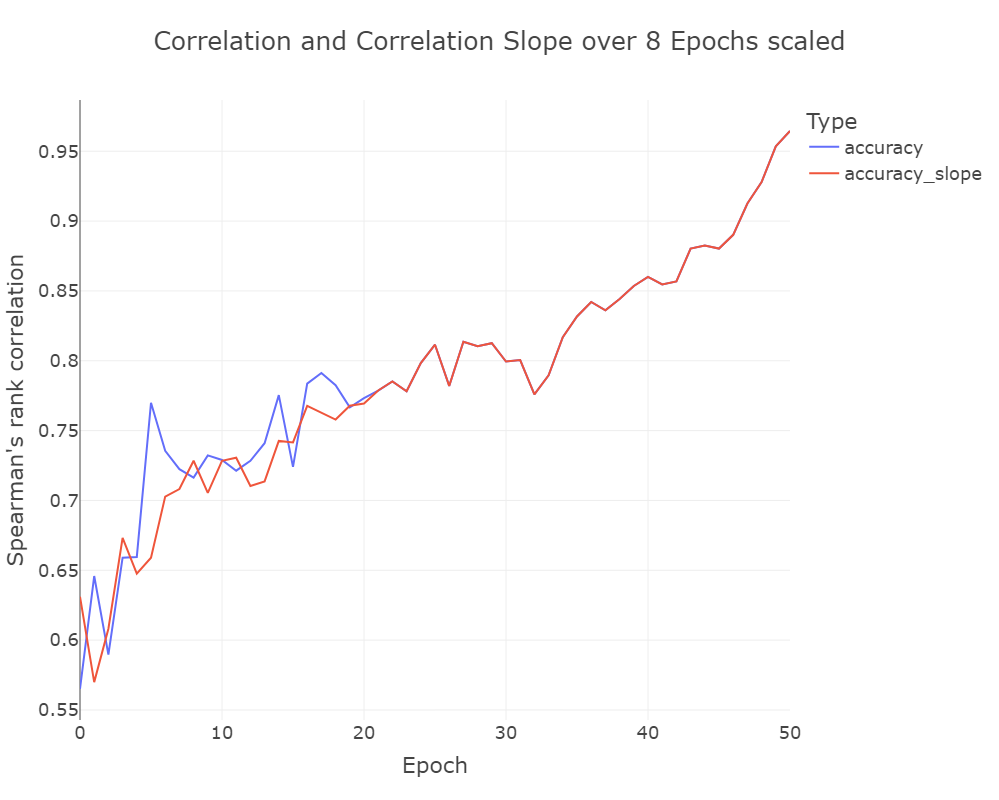

In [98]:
# Plot the data
fig = px.line(df_melted, x='Epoch', y='Value', color='Type', 
              title='Correlation and Correlation Slope over 8 Epochs scaled')
fig.update_traces(line=dict(width=2)) 
fig.update_layout(width=1000, height=800, template="presentation",
                 yaxis_title="Spearman's rank correlation")
fig

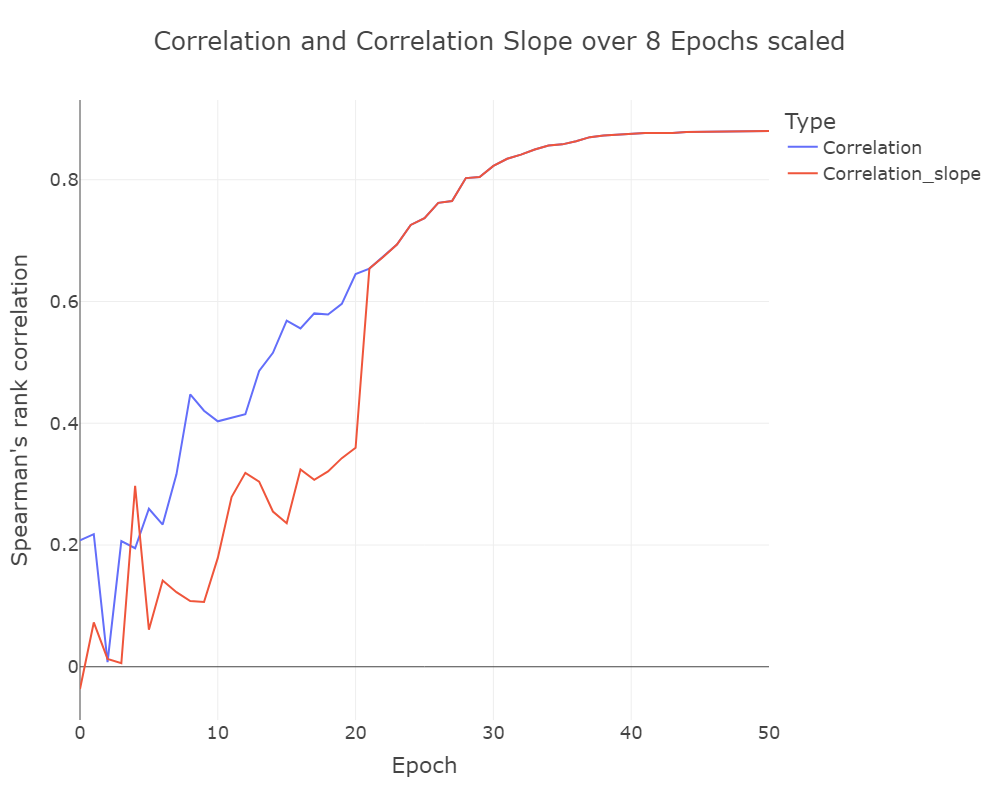

In [99]:
df = pd.DataFrame(list(corr_epochs["correlation"].items()), columns=['Epoch', 'Correlation'])
df_slope = pd.DataFrame(list(corr_epochs["correlation_slope"].items()), columns=['Epoch', 'Correlation_slope'])
df=pd.merge(df, df_slope, on="Epoch")
# Create the line plot using Plotly
df_melted = df.melt(id_vars='Epoch', value_vars=['Correlation', 'Correlation_slope'], 
                    var_name='Type', value_name='Value')

# Plot the data
fig = px.line(df_melted, x='Epoch', y='Value', color='Type', 
              title='Correlation and Correlation Slope over 8 Epochs scaled')
fig.update_traces(line=dict(width=2)) 
fig.update_layout(width=1000, height=800, template="presentation",
                 yaxis_title="Spearman's rank correlation")
fig

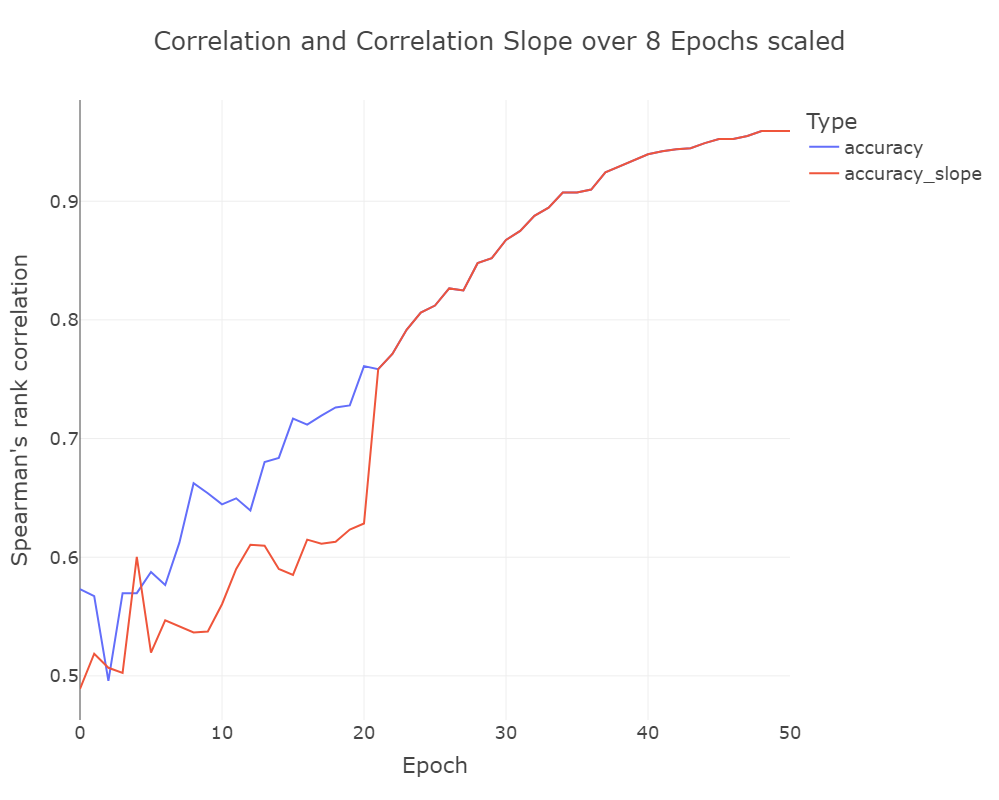

In [100]:
df = pd.DataFrame(list(corr_epochs["accuracy"].items()), columns=['Epoch', 'accuracy'])
df_slope = pd.DataFrame(list(corr_epochs["accuracy_slope"].items()), columns=['Epoch', 'accuracy_slope'])
df=pd.merge(df, df_slope, on="Epoch")
# Create the line plot using Plotly
df_melted = df.melt(id_vars='Epoch', value_vars=['accuracy', 'accuracy_slope'], 
                    var_name='Type', value_name='Value')

# Plot the data
fig = px.line(df_melted, x='Epoch', y='Value', color='Type', 
              title='Correlation and Correlation Slope over 8 Epochs scaled')
fig.update_traces(line=dict(width=2)) 
fig.update_layout(width=1000, height=800, template="presentation",
                 yaxis_title="Spearman's rank correlation")
fig

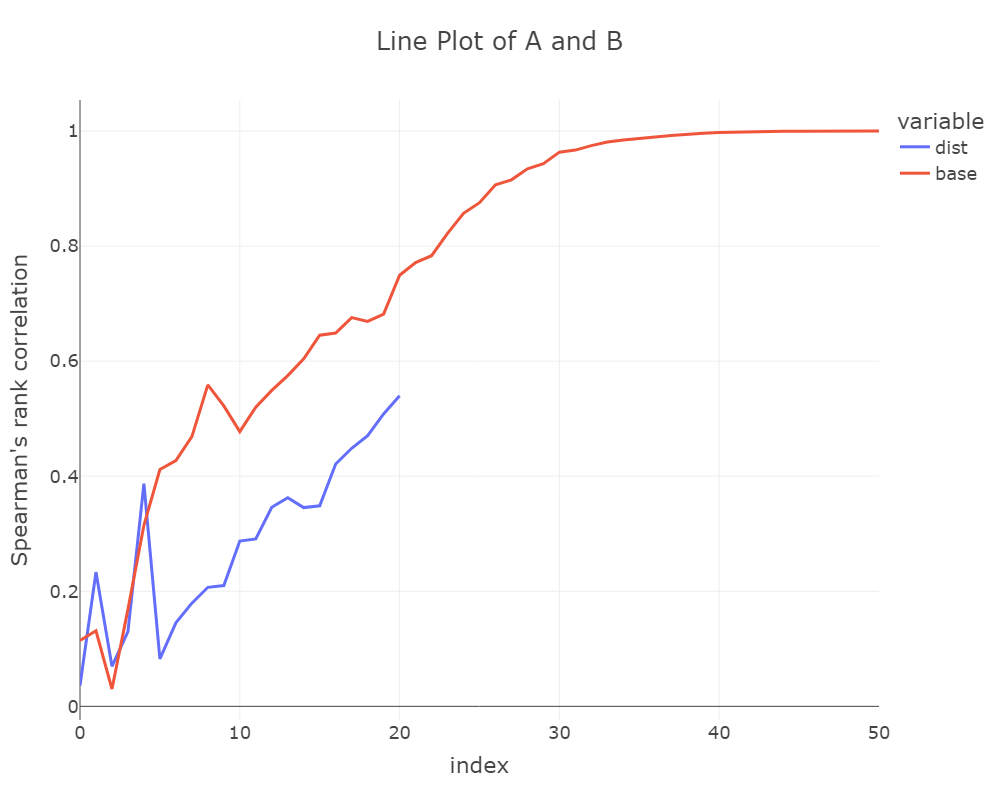

In [102]:
import plotly.express as px

# Create a line plot with two lines (one for each column)
fig = px.line(corr_df.reset_index(drop=True), y=['dist', 'base'], title="Line Plot of A and B")
fig.update_layout(width=800, height=800, template="presentation",
                 yaxis_title="Spearman's rank correlation")
# Show the plot
fig.show()